In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


In [2]:
import tensorflow
from keras.datasets import mnist
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense,Activation,Dropout
from tensorflow.keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier

In [3]:
(x_train_digima,y_train_digima),(x_test_digima,y_test_digima)=mnist.load_data()

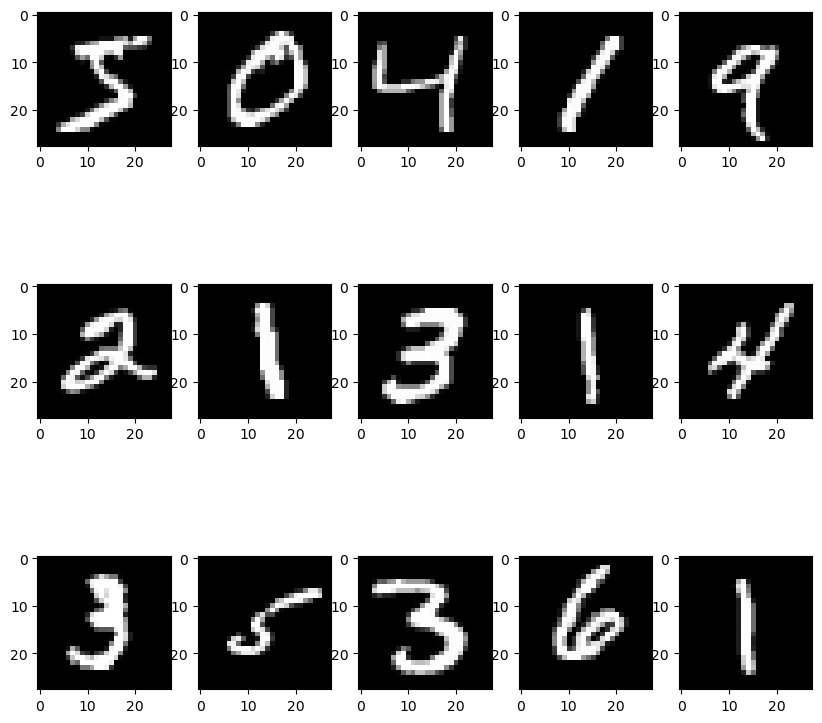

In [4]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(x_train_digima[i],cmap='gray')    

#Preprocessing Input image shape as ANN accepts only 2D (3D to 2D)
    Multiply 28*28 as each image has width and height of 28 pixels and this process of converting rows into single row called flatening

In [5]:
x_train_digima.shape

(60000, 28, 28)

In [6]:
x_test_digima.shape

(10000, 28, 28)

In [7]:
x_train_digima=x_train_digima.reshape(60000,784)
x_test_digima=x_test_digima.reshape(10000,784)

In [8]:
x_train_digima.shape

(60000, 784)

In [9]:
y_train_digima

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

#Preprocessing of output
     We have 10 classes that is 0 to 9 10 to change [7,2,8,9..0] this to [0,1,0,0,0,0,0,0,0] Here value is 2 because at that place only we have 1
     one_hot encoding as in machine learning

In [10]:
y_train_digima=to_categorical(y_train_digima,num_classes=10)
y_test_digima=to_categorical(y_test_digima,num_classes=10)

In [11]:
y_train_digima

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

# Model Creation

In [12]:
model=Sequential([layers.Dense(256,input_shape=(784,),activation='relu'),
                  layers.Dense(64,activation='relu'),
                  layers.Dense(64,activation='relu'),
                  layers.Dense(10,activation='sigmoid')
                 ])

C:\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,218 (868.04 KB)

 Trainable params: 222,218 (868.04 KB)

 Non-trainable params: 0 (0.00 B)

# configuring the model i.e compile

In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Training or making the model to learn

In [15]:
ANN_model=model.fit(x_train_digima,y_train_digima,batch_size=100,epochs=10,validation_data=(x_test_digima,y_test_digima))

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5531 - loss: 4.4683 - val_accuracy: 0.7176 - val_loss: 0.3496
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6948 - loss: 0.3294 - val_accuracy: 0.6829 - val_loss: 0.3011
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6767 - loss: 0.2326 - val_accuracy: 0.6378 - val_loss: 0.2780
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6460 - loss: 0.1835 - val_accuracy: 0.6879 - val_loss: 0.2029
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6846 - loss: 0.1485 - val_accuracy: 0.6607 - val_loss: 0.1926
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6431 - loss: 0.1254 - val_accuracy: 0.7028 - val_loss: 0.1559
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6842 - loss: 0.1210 - val_accuracy: 0.7003 - val_loss: 0.1767
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7090 - loss: 0.1031 - val_accuracy: 0.

In [16]:
y_predict=model.predict(x_test_digima)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


# Reversing preprocessed output ot its actual form

In [17]:
y_pred_digima=np.argmax(y_predict,axis=1)
y_test_digima=np.argmax(y_test_digima,axis=1)

In [18]:
y_pred_digima

array([7, 2, 1, ..., 4, 0, 0], dtype=int64)

# Analysing the accuracy of the model with confusion matrix

In [19]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<Axes: >

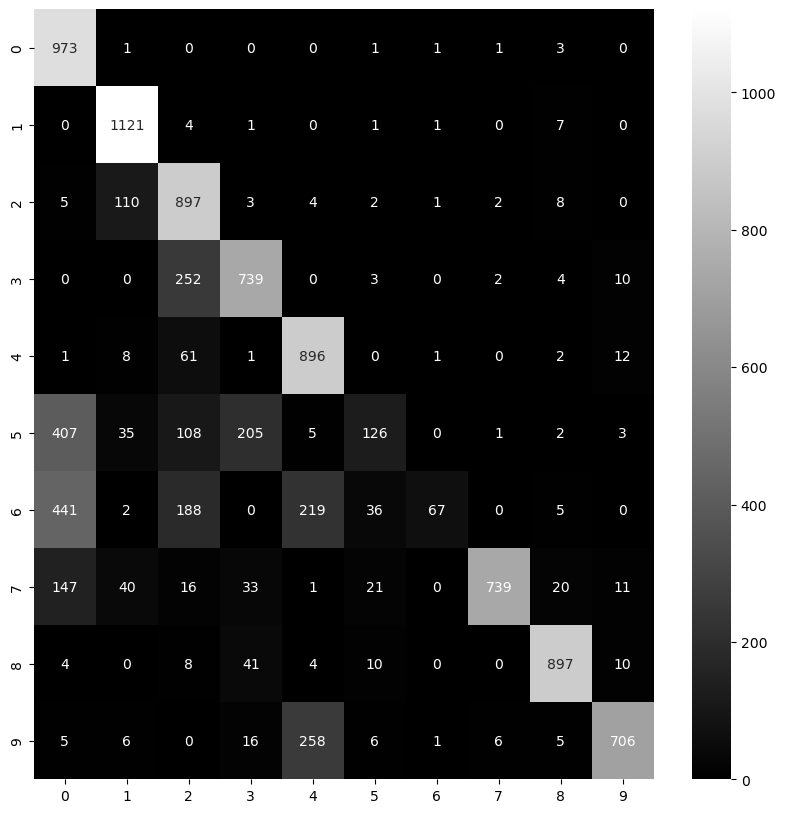

In [20]:
con_matrix=confusion_matrix(y_test_digima,y_pred_digima)
plt.style.use('seaborn-v0_8-deep')
plt.figure(figsize=(10,10))
sb.heatmap(con_matrix,annot=True,fmt='d',cmap='gray')

In [21]:
class_report=classification_report(y_test_digima,y_pred_digima)
print(class_report)

              precision    recall  f1-score   support

           0       0.49      0.99      0.66       980
           1       0.85      0.99      0.91      1135
           2       0.58      0.87      0.70      1032
           3       0.71      0.73      0.72      1010
           4       0.65      0.91      0.76       982
           5       0.61      0.14      0.23       892
           6       0.93      0.07      0.13       958
           7       0.98      0.72      0.83      1028
           8       0.94      0.92      0.93       974
           9       0.94      0.70      0.80      1009

    accuracy                           0.72     10000
   macro avg       0.77      0.70      0.67     10000
weighted avg       0.77      0.72      0.68     10000



In [22]:
print(ANN_model.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


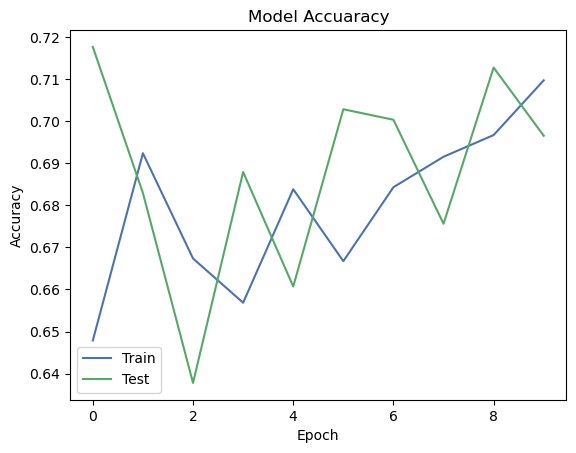

In [23]:
plt.plot(ANN_model.history['accuracy'])
plt.plot(ANN_model.history['val_accuracy'])
plt.title("Model Accuaracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Train','Test'],loc='best')
plt.show()

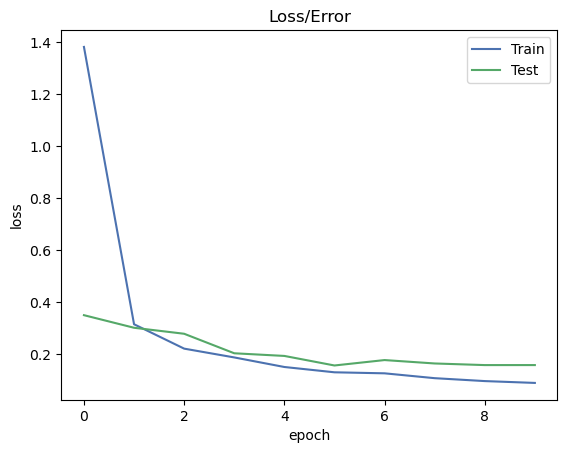

In [24]:
plt.plot(ANN_model.history['loss'])
plt.plot(ANN_model.history['val_loss'])
plt.title("Loss/Error")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Test'],loc='best')
plt.show()

In [25]:
x_test_digima.shape

(10000, 784)

In [26]:
col_names=['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

In [27]:
x_test_digima[2].reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  38, 254, 109,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  87, 252,  82,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

Text(0.5, 0, 'Actual:Nine,Predict:Nine')

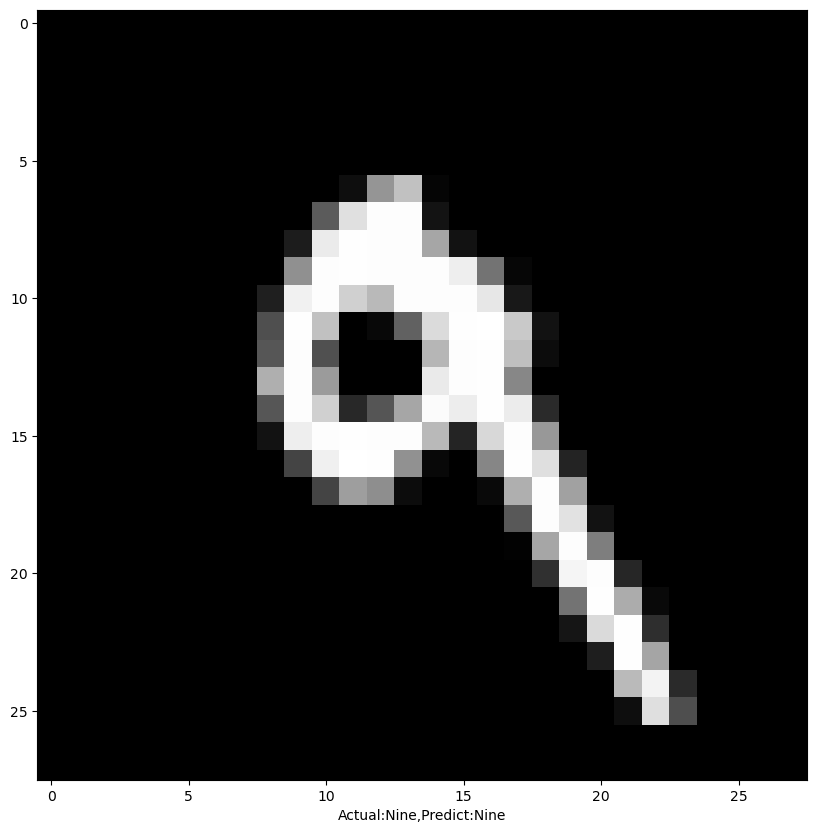

In [28]:
plt.figure(figsize=(10,10))
x_test_digima=x_test_digima[7].reshape(28,28)
plt.imshow(x_test_digima,cmap='gray')
plt.xlabel("Actual:{},Predict:{}".format(col_names[y_test_digima[7]],col_names[y_pred_digima[7]]))